In [1]:
# %matplotlib inline
import numpy as np
import scipy as sc
import matplotlib as mpl
import matplotlib.pyplot as plt

from utils import *

mpl.rcParams.update(rcParams)

In [2]:
%%bash
cd .. && make clean && make

src/Exercice6_2024_student.cpp:181:38: warning: unused parameter 'x' [-Wunused-parameter]
void normalize(const vector<double>& x, vec_cmplx& psi, double dx) {
                                     ^
1 warning generated.


In [3]:
config_name = 'example'
conf = load_conf(config_name)

In [4]:
# Contains tuple of:
# - params
# - data_pot
# - data_phi2[ |Φ|, Re{Φ}, Im{Φ} ]
# - data_obs[t, prob, prob, E, xmoy, x2moy, pmoy, p2moy]
dataset = run_with_params(
    config_name,
    [{}]
)

Running simulations... Done 1/1


# Plots!

In [5]:
plt.close()

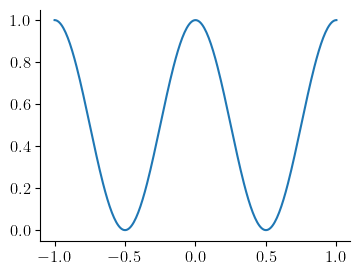

In [6]:
%matplotlib inline
# thingies here
params, data_pot, data_psi2, data_obs = dataset[-1]
plt.plot(data_pot[:,0], data_pot[:,1])

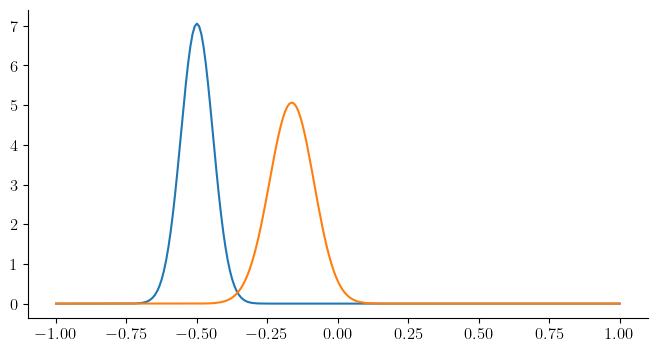

In [7]:
%matplotlib inline
plt.figure(figsize=(8, 4))
plt.plot(data_pot[:,0], data_psi2[0,::3])
# plt.plot(data_pot[:,0], data_phi2[0,1::3])
# plt.plot(data_pot[:,0], data_phi2[0,2::3])
plt.plot(data_pot[:,0], data_psi2[69,::3])

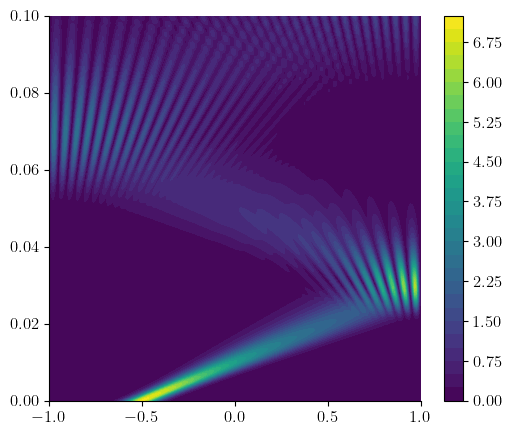

In [8]:
%matplotlib inline
X, Y = np.meshgrid(data_pot[:,0], data_obs[:,0])
plt.figure(figsize=(6,5))
plt.contourf(X, Y, data_psi2[:,::3], levels=32)
plt.colorbar()

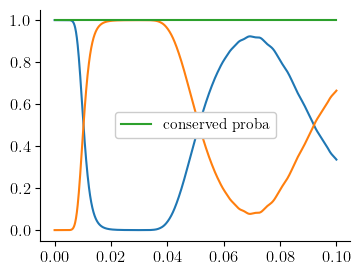

In [9]:
%matplotlib inline

plt.plot(data_obs[:,0], data_obs[:,1])
plt.plot(data_obs[:,0], data_obs[:,2])
plt.plot(data_obs[:,0], data_obs[:,1] + data_obs[:,2], label="conserved proba")

plt.legend()

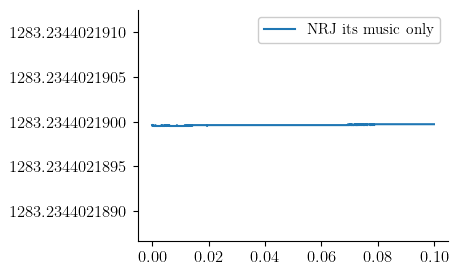

In [10]:
%matplotlib inline

plt.plot(data_obs[:,0], data_obs[:,3], label="NRJ its music only")
plt.legend()

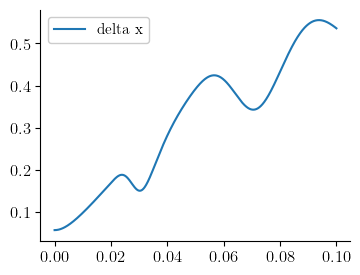

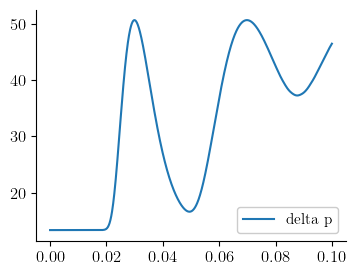

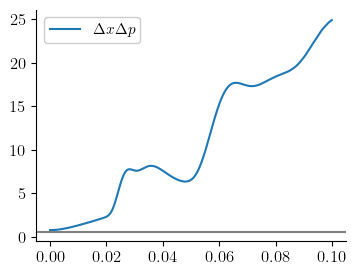

In [11]:
%matplotlib inline

t = data_obs[:,0]
x_moy = data_obs[:,-4]
x2_moy = data_obs[:,-3]
p_moy = data_obs[:,-2]
p2_moy = data_obs[:,-1]

delta_x = np.sqrt(x2_moy - x_moy**2)
delta_p = np.sqrt(p2_moy - p_moy**2)

plt.plot(t, delta_x, label="delta x")
plt.legend()
plt.show()
plt.plot(t, delta_p, label="delta p")
plt.legend()
plt.show()

plt.plot(t, delta_x*delta_p, label=r'$\Delta x \Delta p$')
plt.axhline(1/2)
plt.legend()

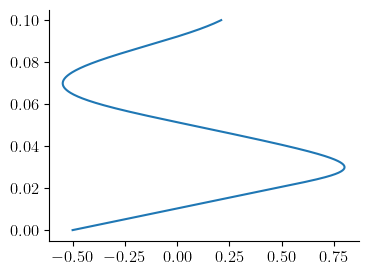

In [12]:
%matplotlib inline
plt.plot(x_moy, t)

In [16]:
%matplotlib qt
import matplotlib.animation as mpla

plt.figure(figsize=(8, 6))

line1, = plt.plot(data_pot[:,0], data_psi2[0,::3])
line2, = plt.plot(data_pot[:,0], data_psi2[0,1::3])
line3, = plt.plot(data_pot[:,0], data_psi2[0,2::3])
size = data_psi2.shape[0]


def animate(i) -> Any:
    idx = i % size
    line1.set_data(data_pot[:,0], data_psi2[idx,::3])
    line2.set_data(data_pot[:,0], data_psi2[idx,1::3])
    line3.set_data(data_pot[:,0], data_psi2[idx,2::3])

anim = mpla.FuncAnimation(plt.gcf(), animate, interval=20, cache_frame_data=True, frames=size)

plt.xlabel(r'$x$ [m]')
plt.ylabel(r'$|\Psi|^2$')
# plt.ylim(-2, 2)
plt.grid()
plt.tight_layout()